### Autocorrelation for all stations with P data for 2005-2016:
### Fisera Ridge, Upper Clearing, Hay Meadow
### Kananaskis, Bow Valley, Kananaskis Pocaterra, Banff CS, Wildcat Hills

In [1]:
import numpy as np
import pandas as pd
import math
import scipy as st
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt

### Fisera Ridge 2325 m

FR lag 1 = 0.298
FR lag 2 = 0.079
FR lag 3 = 0.033
FR lag 4 = 0.005
FR lag 5 = 0.001


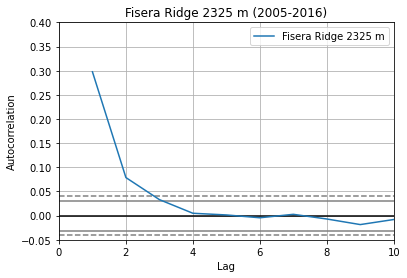

In [2]:
# Use pd.read_csv to read csv file
FRP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\FRdailyprecip.csv", 
                            header=None, names= ["date", "FR_p_mm"])
FRP_df.set_index("date", inplace=True)
# FRP_df.head()

# plot autocorrelation
pd.plotting.autocorrelation_plot(FRP_df.FR_p_mm, label='Fisera Ridge 2325 m', color='tab:blue')
plt.xlim(0, 10)
plt.ylim(-0.05, 0.4)
plt.title("Fisera Ridge 2325 m (2005-2016)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2016_stns\FRlag2005-16.png')

# calculate correlation values for some lags
FRlag1 = FRP_df['FR_p_mm'].autocorr(lag=1).round(3)
FRlag2 = FRP_df['FR_p_mm'].autocorr(lag=2).round(3)
FRlag3 = FRP_df['FR_p_mm'].autocorr(lag=3).round(3)
FRlag4 = FRP_df['FR_p_mm'].autocorr(lag=4).round(3)
FRlag5 = FRP_df['FR_p_mm'].autocorr(lag=5).round(3)
print("FR lag 1 =", FRlag1)
print("FR lag 2 =", FRlag2)
print("FR lag 3 =", FRlag3)
print("FR lag 4 =", FRlag4)
print("FR lag 5 =", FRlag5)

### Upper Clearing 1845 m

UC lag 1 = 0.303
UC lag 2 = 0.056
UC lag 3 = 0.016
UC lag 4 = -0.003
UC lag 5 = -0.002


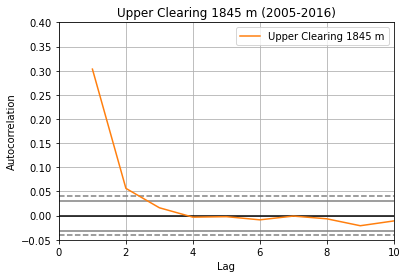

In [3]:
# Use pd.read_csv to read csv file
UCP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\UCdailyprecip.csv", 
                            header=None, names= ["date", "UC_p_mm"])
UCP_df.set_index("date", inplace=True)
# UCP_df.head()

# plot autocorrelation
pd.plotting.autocorrelation_plot(UCP_df.UC_p_mm, label='Upper Clearing 1845 m', color='tab:orange')
plt.xlim(0, 10)
plt.ylim(-0.05, 0.4)
plt.title("Upper Clearing 1845 m (2005-2016)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2016_stns\UClag2005-16.png')

# calculate correlation values for some lags
UClag1 = UCP_df['UC_p_mm'].autocorr(lag=1).round(3)
UClag2 = UCP_df['UC_p_mm'].autocorr(lag=2).round(3)
UClag3 = UCP_df['UC_p_mm'].autocorr(lag=3).round(3)
UClag4 = UCP_df['UC_p_mm'].autocorr(lag=4).round(3)
UClag5 = UCP_df['UC_p_mm'].autocorr(lag=5).round(3)
print("UC lag 1 =", UClag1)
print("UC lag 2 =", UClag2)
print("UC lag 3 =", UClag3)
print("UC lag 4 =", UClag4)
print("UC lag 5 =", UClag5)

### Kananaskis Pocaterra 1610.0 m

KP lag 1 = 0.238
KP lag 2 = 0.081
KP lag 3 = 0.06
KP lag 4 = 0.043
KP lag 5 = 0.019


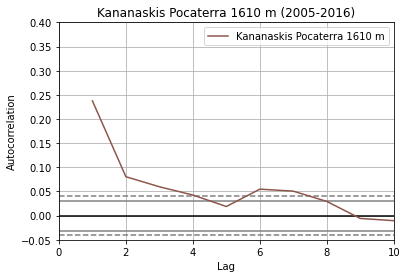

In [4]:
# Use pd.read_csv to read csv file
KPP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis_Pocaterra\en_climate_daily_AB_3053604_2005-2016_P1D.csv", 
                               header=[0])
# rename columns
KPP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'KP_p_mm'}, inplace=True) # rename date column
# set date index
KPP_df.set_index("date", inplace=True)
# change datetime format to YMD
KPP_df.index = pd.to_datetime(KPP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
KPP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
KPP_df["KP_p_mm"] = KPP_df["KP_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
KPP_df.drop(KPP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016
KPP_df.drop(KPP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(KPP_df.KP_p_mm, label='Kananaskis Pocaterra 1610 m', color='tab:brown')
plt.xlim(0, 10)
plt.ylim(-0.05, 0.4)
plt.title("Kananaskis Pocaterra 1610 m (2005-2016)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2016_stns\KPlag2005-16.png')

# calculate correlation values for some lags
KPlag1 = KPP_df['KP_p_mm'].autocorr(lag=1).round(3)
KPlag2 = KPP_df['KP_p_mm'].autocorr(lag=2).round(3)
KPlag3 = KPP_df['KP_p_mm'].autocorr(lag=3).round(3)
KPlag4 = KPP_df['KP_p_mm'].autocorr(lag=4).round(3)
KPlag5 = KPP_df['KP_p_mm'].autocorr(lag=5).round(3)
print("KP lag 1 =", KPlag1)
print("KP lag 2 =", KPlag2)
print("KP lag 3 =", KPlag3)
print("KP lag 4 =", KPlag4)
print("KP lag 5 =", KPlag5)

### Hay Meadow 1436 m

HM lag 1 = 0.347
HM lag 2 = 0.074
HM lag 3 = 0.025
HM lag 4 = -0.003
HM lag 5 = -0.008


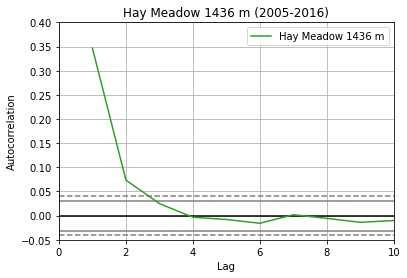

In [5]:
# Use pd.read_csv to read csv file
HMP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\HMdailyprecip.csv", 
                            header=None, names= ["date", "HM_p_mm"])
HMP_df.set_index("date", inplace=True)
# HMP_df.head()

# plot autocorrelation
pd.plotting.autocorrelation_plot(HMP_df.HM_p_mm, label='Hay Meadow 1436 m', color='tab:green')
plt.xlim(0, 10)
plt.ylim(-0.05, 0.4)
plt.title("Hay Meadow 1436 m (2005-2016)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2016_stns\HMlag2005-16.png')

# calculate correlation values for some lags
HMlag1 = HMP_df['HM_p_mm'].autocorr(lag=1).round(3)
HMlag2 = HMP_df['HM_p_mm'].autocorr(lag=2).round(3)
HMlag3 = HMP_df['HM_p_mm'].autocorr(lag=3).round(3)
HMlag4 = HMP_df['HM_p_mm'].autocorr(lag=4).round(3)
HMlag5 = HMP_df['HM_p_mm'].autocorr(lag=5).round(3)
print("HM lag 1 =", HMlag1)
print("HM lag 2 =", HMlag2)
print("HM lag 3 =", HMlag3)
print("HM lag 4 =", HMlag4)
print("HM lag 5 =", HMlag5)

### Banff CS 1396.9 m

BCS lag 1 = 0.271
BCS lag 2 = 0.045
BCS lag 3 = 0.033
BCS lag 4 = 0.021
BCS lag 5 = -0.002


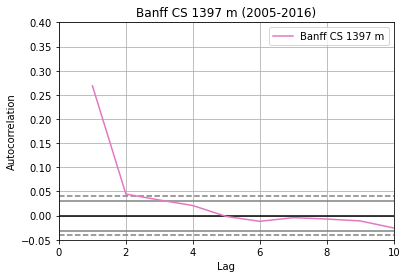

In [6]:
# Use pd.read_csv to read csv file
BCSP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Banff_CS\en_climate_daily_AB_3050519_2005-2016_P1D.csv", 
                               header=[0])
# rename columns
BCSP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BCS_p_mm'}, inplace=True) # rename date column
# set date index
BCSP_df.set_index("date", inplace=True)
# change datetime format to YMD
BCSP_df.index = pd.to_datetime(BCSP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
BCSP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
BCSP_df["BCS_p_mm"] = BCSP_df["BCS_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
BCSP_df.drop(BCSP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016
BCSP_df.drop(BCSP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(BCSP_df.BCS_p_mm, label='Banff CS 1397 m', color='tab:pink')
plt.xlim(0, 10)
plt.ylim(-0.05, 0.4)
plt.title("Banff CS 1397 m (2005-2016)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2016_stns\BCSlag2005-16.png')

# calculate correlation values for some lags
BCSlag1 = BCSP_df['BCS_p_mm'].autocorr(lag=1).round(3)
BCSlag2 = BCSP_df['BCS_p_mm'].autocorr(lag=2).round(3)
BCSlag3 = BCSP_df['BCS_p_mm'].autocorr(lag=3).round(3)
BCSlag4 = BCSP_df['BCS_p_mm'].autocorr(lag=4).round(3)
BCSlag5 = BCSP_df['BCS_p_mm'].autocorr(lag=5).round(3)
print("BCS lag 1 =", BCSlag1)
print("BCS lag 2 =", BCSlag2)
print("BCS lag 3 =", BCSlag3)
print("BCS lag 4 =", BCSlag4)
print("BCS lag 5 =", BCSlag5)

### Kananaskis 1391.1 m

K lag 1 = 0.318
K lag 2 = 0.098
K lag 3 = 0.033
K lag 4 = 0.027
K lag 5 = -0.006


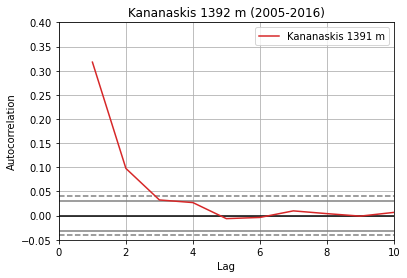

In [7]:
# Use pd.read_csv to read csv file
KP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis\en_climate_daily_AB_3053600_2005-2016_P1D.csv", 
                               header=[0])
# rename columns
KP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'K_p_mm'}, inplace=True) # rename date column
# set date index
KP_df.set_index("date", inplace=True)
# change datetime format to YMD
KP_df.index = pd.to_datetime(KP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
KP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
KP_df["K_p_mm"] = KP_df["K_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
KP_df.drop(KP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016
KP_df.drop(KP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(KP_df.K_p_mm, label='Kananaskis 1391 m', color='tab:red')
plt.xlim(0, 10)
plt.ylim(-0.05, 0.4)
plt.title("Kananaskis 1392 m (2005-2016)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2016_stns\Klag2005-16.png')

# calculate correlation values for some lags
Klag1 = KP_df['K_p_mm'].autocorr(lag=1).round(3)
Klag2 = KP_df['K_p_mm'].autocorr(lag=2).round(3)
Klag3 = KP_df['K_p_mm'].autocorr(lag=3).round(3)
Klag4 = KP_df['K_p_mm'].autocorr(lag=4).round(3)
Klag5 = KP_df['K_p_mm'].autocorr(lag=5).round(3)
print("K lag 1 =", Klag1)
print("K lag 2 =", Klag2)
print("K lag 3 =", Klag3)
print("K lag 4 =", Klag4)
print("K lag 5 =", Klag5)

### Bow Valley 1297.5 m

BV lag 1 = 0.332
BV lag 2 = 0.064
BV lag 3 = 0.013
BV lag 4 = 0.01
BV lag 5 = 0.024


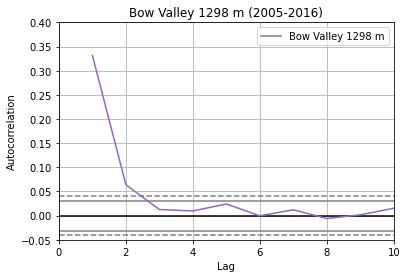

In [8]:
# Use pd.read_csv to read csv file
BVP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Bow_Valley\en_climate_daily_AB_3050778_2005-2016_P1D.csv", 
                               header=[0])
# rename columns
BVP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BV_p_mm'}, inplace=True) # rename date column
# set date index
BVP_df.set_index("date", inplace=True)
# change datetime format to YMD
BVP_df.index = pd.to_datetime(BVP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
BVP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
BVP_df["BV_p_mm"] = BVP_df["BV_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
BVP_df.drop(BVP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016
BVP_df.drop(BVP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(BVP_df.BV_p_mm, label='Bow Valley 1298 m', color='tab:purple')
plt.xlim(0, 10)
plt.ylim(-0.05, 0.4)
plt.title("Bow Valley 1298 m (2005-2016)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2016_stns\BVlag2005-16.png')

# calculate correlation values for some lags
BVlag1 = BVP_df['BV_p_mm'].autocorr(lag=1).round(3)
BVlag2 = BVP_df['BV_p_mm'].autocorr(lag=2).round(3)
BVlag3 = BVP_df['BV_p_mm'].autocorr(lag=3).round(3)
BVlag4 = BVP_df['BV_p_mm'].autocorr(lag=4).round(3)
BVlag5 = BVP_df['BV_p_mm'].autocorr(lag=5).round(3)
print("BV lag 1 =", BVlag1)
print("BV lag 2 =", BVlag2)
print("BV lag 3 =", BVlag3)
print("BV lag 4 =", BVlag4)
print("BV lag 5 =", BVlag5)

### Wildcat Hills 1268.0 m

WH lag 1 = 0.332
WH lag 2 = 0.118
WH lag 3 = 0.082
WH lag 4 = 0.06
WH lag 5 = 0.032


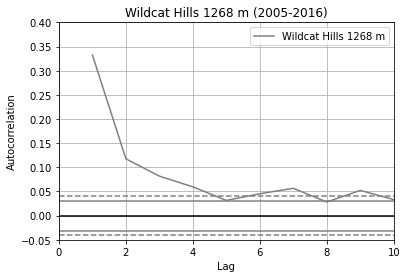

In [9]:
# Use pd.read_csv to read csv file
WHP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Wild_Cat_Hills\en_climate_daily_AB_3037550_2005-2016_P1D.csv", 
                               header=[0])
# rename columns
WHP_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'WH_p_mm'}, inplace=True) # rename date column
# set date index
WHP_df.set_index("date", inplace=True)
# change datetime format to YMD
WHP_df.index = pd.to_datetime(WHP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
WHP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
WHP_df["WH_p_mm"] = WHP_df["WH_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
WHP_df.drop(WHP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct to 31st Dec 2016
WHP_df.drop(WHP_df.loc["2016-10-02":"2016-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(WHP_df.WH_p_mm, label='Wildcat Hills 1268 m', color='tab:gray')
plt.xlim(0, 10)
plt.ylim(-0.05, 0.4)
plt.title("Wildcat Hills 1268 m (2005-2016)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2016_stns\WHlag2005-16.png')

# calculate correlation values for some lags
WHlag1 = WHP_df['WH_p_mm'].autocorr(lag=1).round(3)
WHlag2 = WHP_df['WH_p_mm'].autocorr(lag=2).round(3)
WHlag3 = WHP_df['WH_p_mm'].autocorr(lag=3).round(3)
WHlag4 = WHP_df['WH_p_mm'].autocorr(lag=4).round(3)
WHlag5 = WHP_df['WH_p_mm'].autocorr(lag=5).round(3)
print("WH lag 1 =", WHlag1)
print("WH lag 2 =", WHlag2)
print("WH lag 3 =", WHlag3)
print("WH lag 4 =", WHlag4)
print("WH lag 5 =", WHlag5)

### Create a lag dataframe

In [10]:
# step 1: initialise my lists
data = [["FR 2325 m", FRlag1, FRlag2, FRlag3, FRlag4, FRlag5],
       ["UC 1845 m", UClag1, UClag2, UClag3, UClag4, UClag5],
       ["KP 1610 m", KPlag1, KPlag2, KPlag3, KPlag4, KPlag5],
       ["HM 1436 m", HMlag1, HMlag2, HMlag3, HMlag4, HMlag5],
       ["BCS 1397 m", BCSlag1, BCSlag2, BCSlag3, BCSlag4, BCSlag5], 
       ["K 1391 m", Klag1, Klag2, Klag3, Klag4, Klag5],
       ["BV 1298 m", BVlag1, BVlag2, BVlag3, BVlag4, BVlag5],
       ["WH 1268 m", WHlag1, WHlag2, WHlag3, WHlag4, WHlag5]]
data

[['FR 2325 m', 0.298, 0.079, 0.033, 0.005, 0.001],
 ['UC 1845 m', 0.303, 0.056, 0.016, -0.003, -0.002],
 ['KP 1610 m', 0.238, 0.081, 0.06, 0.043, 0.019],
 ['HM 1436 m', 0.347, 0.074, 0.025, -0.003, -0.008],
 ['BCS 1397 m', 0.271, 0.045, 0.033, 0.021, -0.002],
 ['K 1391 m', 0.318, 0.098, 0.033, 0.027, -0.006],
 ['BV 1298 m', 0.332, 0.064, 0.013, 0.01, 0.024],
 ['WH 1268 m', 0.332, 0.118, 0.082, 0.06, 0.032]]

In [11]:
# step 2: create df from lists
lag_df = pd.DataFrame(data, columns = ["station", "lag 1", "lag 2", "lag 3", "lag 4", "lag 5"])
lag_df.set_index("station", inplace=True)
lag_df

,lag 1,lag 2,lag 3,lag 4,lag 5
station,,,,,
FR 2325 m,0.298,0.079,0.033,0.005,0.001
UC 1845 m,0.303,0.056,0.016,-0.003,-0.002
KP 1610 m,0.238,0.081,0.060,0.043,0.019
HM 1436 m,0.347,0.074,0.025,-0.003,-0.008
BCS 1397 m,0.271,0.045,0.033,0.021,-0.002
K 1391 m,0.318,0.098,0.033,0.027,-0.006
BV 1298 m,0.332,0.064,0.013,0.010,0.024
WH 1268 m,0.332,0.118,0.082,0.060,0.032


### Write dataframe to csv (Note: opening csv file in Excel shows the wrong date format (dmy) but this is an Excel glitch - ignore it!)

In [12]:
lag_df.to_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\autocorr_lag_2005-2016.csv")